## 0. Install and Import Dependencies

In [1]:
# !pip install easyocr
!pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25872 sha256=7c5f1c1e16e1a060c025bab46322160b2c67e70b8d82d46ea7b282a1df217f26
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\86\d7\0a\4923351ed1cec5d5e24c1eaf8905567b02a0343b24aa873df2
Successfully built imutils


In [3]:
!pip install matplotlib

  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils

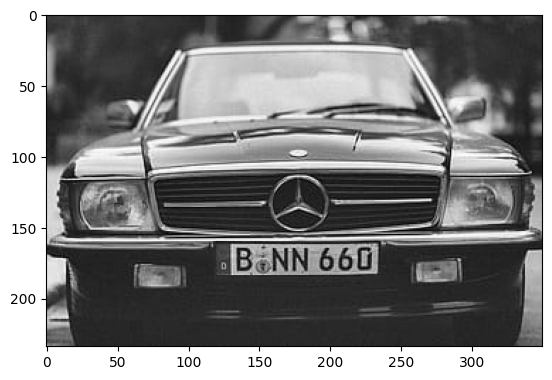

In [5]:
img = cv2.imread('car_img.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

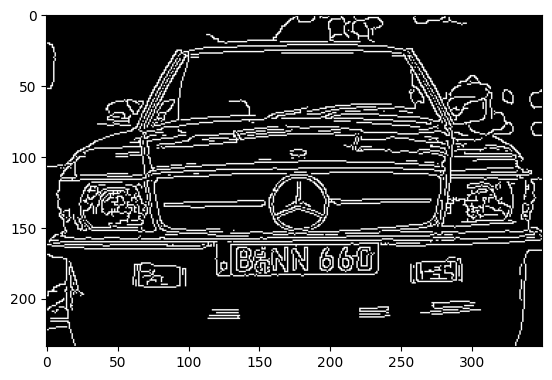

In [6]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [7]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [9]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [10]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

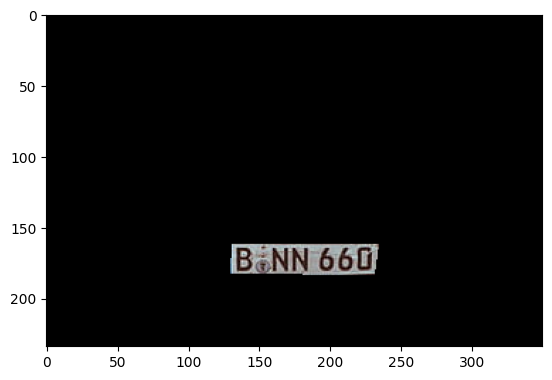

In [11]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [12]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

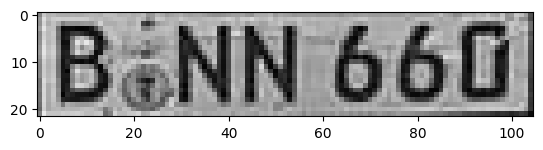

In [13]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [14]:
cv2.imwrite('cropped_img.jpg', cropped_image)

True

In [15]:
import os
from google.cloud import vision
import io

def detect_text(path):
    """Identifies text in the image 

    Args:
        path (string): path of the image file 

    Raises:
        Exception: cloud api error

    Returns:
        _type_: text present in the image
    """

    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    text = texts[0].description
    print(text)

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))
    
    return text
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "ServiceAccount.json"

In [ ]:
text = detect_text('cropped_img.jpg')
print(text)